# TMDb Movie Data - What contributes to making a genre popular?


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>


<a id='intro'></a>
## Introduction

> **What contributes to making a genre popular?** 
This study uses the data set containing information from about 10,000 movies collected from The Movie Database (TMDb). This data set contains information on a list of movies including its popularity, adjusted budget, adjusted revenue, run time, release year, vote average and so on. This study evaluates how each of the factors listed in the previous sentence impacts
the popularity of a movie's genre. Is there a correlation between each of these factors and the genre of the movie?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load data
df = pd.read_csv('tmdb-movies.csv')
pd.options.display.max_columns = None
display(df)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment

In [4]:
# What is the shape of this data frame?
df.shape

(10866, 21)

In [5]:
# Summary Statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning

In [6]:
# Only grab the columns that we want to analyze
df = df[["genres", "popularity", "vote_average", "runtime", "budget_adj", "revenue_adj", "release_year"]]
df

,genres,popularity,vote_average,runtime,budget_adj,revenue_adj,release_year
0,Action|Adventure|Science Fiction|Thriller,32.985763,6.5,124,1.379999e+08,1.392446e+09,2015
1,Action|Adventure|Science Fiction|Thriller,28.419936,7.1,120,1.379999e+08,3.481613e+08,2015
2,Adventure|Science Fiction|Thriller,13.112507,6.3,119,1.012000e+08,2.716190e+08,2015
3,Action|Adventure|Science Fiction|Fantasy,11.173104,7.5,136,1.839999e+08,1.902723e+09,2015
4,Action|Crime|Thriller,9.335014,7.3,137,1.747999e+08,1.385749e+09,2015
5,Western|Drama|Adventure|Thriller,9.110700,7.2,156,1.241999e+08,4.903142e+08,2015
6,Science Fiction|Action|Thriller|Adventure,8.654359,5.8,125,1.425999e+08,4.053551e+08,2015
7,Drama|Adventure|Science Fiction,7.667400,7.6,141,9.935996e+07,5.477497e+08,2015
8,Family|Animation|Adventure|Comedy,7.404165,6.5,91,6.807997e+07,1.064192e+09,2015
9,Comedy|Animation|Family,6.326804,8.0,94,1.609999e+08,7.854116e+08,2015


In [7]:
# View missing value count for each feature.
df.isnull().sum()
# There is no missing data, so we don't need to drop any rows.

genres          23
popularity       0
vote_average     0
runtime          0
budget_adj       0
revenue_adj      0
release_year     0
dtype: int64

In [8]:
# Show how many duplicate entries are in the dataset.
sum(df.duplicated())
# There aren't any duplicates, so we don't need to drop any.

1

In [9]:
# Remove duplicates.
df.drop_duplicates()
sum(df.duplicated())

1

In [10]:
# Remove rows with zero values.
df = df[(df != 0).all(1)]
df

,genres,popularity,vote_average,runtime,budget_adj,revenue_adj,release_year
0,Action|Adventure|Science Fiction|Thriller,32.985763,6.5,124,1.379999e+08,1.392446e+09,2015
1,Action|Adventure|Science Fiction|Thriller,28.419936,7.1,120,1.379999e+08,3.481613e+08,2015
2,Adventure|Science Fiction|Thriller,13.112507,6.3,119,1.012000e+08,2.716190e+08,2015
3,Action|Adventure|Science Fiction|Fantasy,11.173104,7.5,136,1.839999e+08,1.902723e+09,2015
4,Action|Crime|Thriller,9.335014,7.3,137,1.747999e+08,1.385749e+09,2015
5,Western|Drama|Adventure|Thriller,9.110700,7.2,156,1.241999e+08,4.903142e+08,2015
6,Science Fiction|Action|Thriller|Adventure,8.654359,5.8,125,1.425999e+08,4.053551e+08,2015
7,Drama|Adventure|Science Fiction,7.667400,7.6,141,9.935996e+07,5.477497e+08,2015
8,Family|Animation|Adventure|Comedy,7.404165,6.5,91,6.807997e+07,1.064192e+09,2015
9,Comedy|Animation|Family,6.326804,8.0,94,1.609999e+08,7.854116e+08,2015


In [11]:
# There are multiple genre entries for each movie. Split these genre entries.
all_genres = df.join(df.genres
               .str.strip('|')
               .str.split('|',expand=True)
               .stack()
               .reset_index(level=1,drop=True)
               .rename('genre')).reset_index(drop=True)
all_genres

,genres,popularity,vote_average,runtime,budget_adj,revenue_adj,release_year,genre
0,Action|Adventure|Science Fiction|Thriller,32.985763,6.5,124,1.379999e+08,1.392446e+09,2015,Action
1,Action|Adventure|Science Fiction|Thriller,32.985763,6.5,124,1.379999e+08,1.392446e+09,2015,Adventure
2,Action|Adventure|Science Fiction|Thriller,32.985763,6.5,124,1.379999e+08,1.392446e+09,2015,Science Fiction
3,Action|Adventure|Science Fiction|Thriller,32.985763,6.5,124,1.379999e+08,1.392446e+09,2015,Thriller
4,Action|Adventure|Science Fiction|Thriller,28.419936,7.1,120,1.379999e+08,3.481613e+08,2015,Action
5,Action|Adventure|Science Fiction|Thriller,28.419936,7.1,120,1.379999e+08,3.481613e+08,2015,Adventure
6,Action|Adventure|Science Fiction|Thriller,28.419936,7.1,120,1.379999e+08,3.481613e+08,2015,Science Fiction
7,Action|Adventure|Science Fiction|Thriller,28.419936,7.1,120,1.379999e+08,3.481613e+08,2015,Thriller
8,Adventure|Science Fiction|Thriller,13.112507,6.3,119,1.012000e+08,2.716190e+08,2015,Adventure
9,Adventure|Science Fiction|Thriller,13.112507,6.3,119,1.012000e+08,2.716190e+08,2015,Science Fiction


In [12]:
# Group the mean adjusted budget by genre
genre_budget = all_genres.groupby('genre').budget_adj.mean()

# Group the mean popularity by genre
genre_popularity = all_genres.groupby('genre').popularity.mean()

# Group the mean runtime by genre
genre_runtime = all_genres.groupby('genre').runtime.mean()

# Group the mean release year by genre
genre_release_year = all_genres.groupby('genre').release_year.mean()

# Group the mean vote average by genre
genre_vote = all_genres.groupby('genre').vote_average.mean()

# Group the mean adjusted revenue by genre
genre_revenue = all_genres.groupby('genre').revenue_adj.mean()

# Combine all of the new data into one dataframe
genre_data = pd.concat([genre_budget, genre_popularity, genre_revenue, genre_runtime, genre_release_year, genre_vote], axis=1)  # Combine data frame based on indexes (genre)
genre_data

,budget_adj,popularity,revenue_adj,runtime,release_year,vote_average
genre,,,,,,
Action,6.640907e+07,1.566222,1.952089e+08,111.645488,2000.690608,6.036004
Adventure,8.125573e+07,1.867693,2.714075e+08,112.615487,2000.178905,6.124433
Animation,8.347215e+07,1.710622,2.909574e+08,89.228856,2003.930348,6.380597
Comedy,3.917646e+07,1.012321,1.213085e+08,101.650957,2001.655376,6.026436
Crime,3.989487e+07,1.123152,1.102273e+08,111.523006,2000.682515,6.298620
Documentary,5.379702e+06,0.294458,2.480617e+07,101.428571,2004.742857,6.660000
Drama,3.470978e+07,1.001181,1.013213e+08,115.892430,2001.393853,6.395959
Family,7.110099e+07,1.459043,2.437910e+08,98.665882,2001.682353,6.127059
Fantasy,8.023752e+07,1.754315,2.499928e+08,107.608586,2001.184343,6.062879


<a id='eda'></a>
## Exploratory Data Analysis



### What contributes to making a movie genre popular?



In [13]:
d = genre_data.reset_index()

### **Part 1**: Average Popularity of Genres

Text(0,0.5,'Popularity')

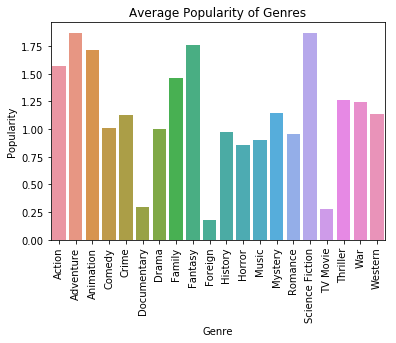

In [14]:
# Average popularity of genres
g = sns.barplot(data=d, x="genre", y="popularity")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
ax = plt.gca()
ax.set_title("Average Popularity of Genres")
plt.xlabel("Genre")
plt.ylabel("Popularity")

Science fiction was the most popular genre and foreign was the least popular genre.

In [15]:
# List of data to show genre popularity ranking
genre_data.sort_values('popularity', ascending=False).popularity

genre
Science Fiction    1.870838
Adventure          1.867693
Fantasy            1.754315
Animation          1.710622
Action             1.566222
Family             1.459043
Thriller           1.258400
War                1.246129
Mystery            1.142613
Western            1.134246
Crime              1.123152
Comedy             1.012321
Drama              1.001181
History            0.970674
Romance            0.954889
Music              0.899005
Horror             0.854005
Documentary        0.294458
TV Movie           0.273628
Foreign            0.179608
Name: popularity, dtype: float64

Text(0,0.5,'Frequency of Occurence')

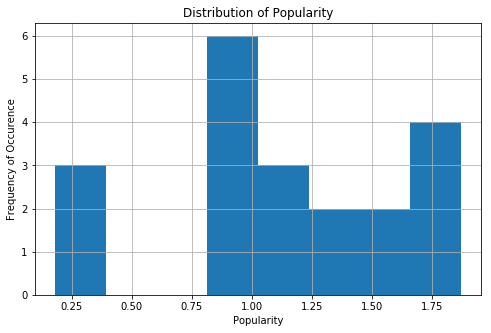

In [16]:
d.popularity.hist(figsize=[8, 5], bins=8)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency of Occurence')

The most frequently occuring popularity score for movie genres is approximately between 0.8 and 1.25.

### Part 2: Average Adjusted Budget of Genres vs Average Popularity of Genres

Text(37.5228,0.5,'Popularity')

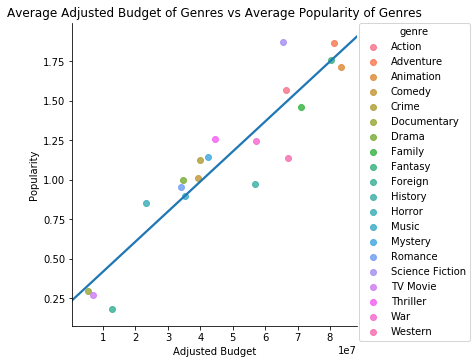

In [17]:
# Average adjusted budget of genres vs average popularity of genres
g = sns.lmplot(data=d, x="budget_adj", y="popularity", hue="genre", fit_reg=False)  # Draw points as separate data without line of fit
sns.regplot(data=d, x="budget_adj", y="popularity", scatter=False, ax=g.axes[0, 0], ci=None)  # Draw line of fit to all points
ax = plt.gca()
ax.set_title("Average Adjusted Budget of Genres vs Average Popularity of Genres")
plt.xlabel("Adjusted Budget")
plt.ylabel("Popularity")

There seems to be a positive correlation between the average budget of a genre and the popularity of that genre. In general, the higher the budget, the more popular the genre. On average, animation movies have the highest budget. The most popular genre was science fiction. 

Text(0,0.5,'Frequency of Occurence')

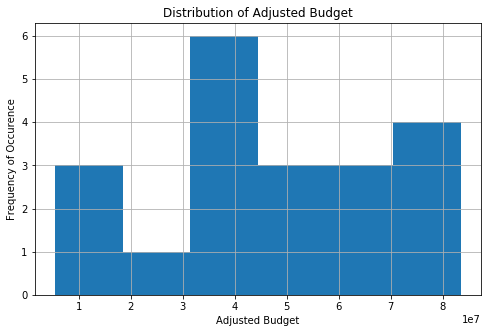

In [18]:
d.budget_adj.hist(figsize=[8,5], bins=6)
plt.title('Distribution of Adjusted Budget')
plt.xlabel('Adjusted Budget')
plt.ylabel('Frequency of Occurence')

The most frequently occuring adjusted budget for movie genres is approximately between 3.1e^7 and 4.4e^7.

### Part 3: Average Adjusted Revenue of Genres vs Average Popularity of Genres

Text(37.5228,0.5,'Popularity')

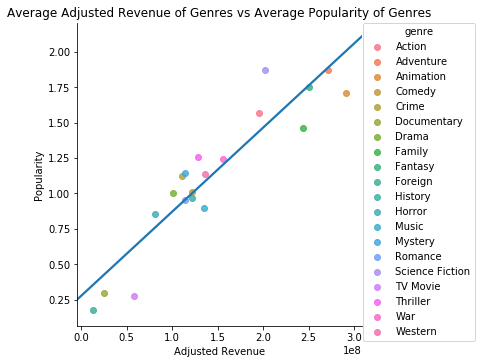

In [19]:
# Average adjusted revenue of genres vs average popularity of genres
g = sns.lmplot(data=d, x="revenue_adj", y="popularity", hue="genre", fit_reg=False)  # Draw points as separate data without line of fit
sns.regplot(data=d, x="revenue_adj", y="popularity", scatter=False, ax=g.axes[0, 0], ci=None)  # Draw line of fit to all points
ax = plt.gca()
ax.set_title("Average Adjusted Revenue of Genres vs Average Popularity of Genres")
plt.xlabel("Adjusted Revenue")
plt.ylabel("Popularity")

There was also a positive correlation between the average adjusted revenue of a genre and the popularity of that genre. That is to say, the more revenue a genre generates, the more popular the genre is. Animation movies had the highest revenue on average.

Text(0,0.5,'Frequency of Occurence')

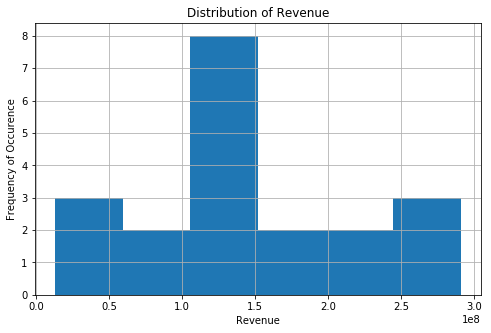

In [20]:
d.revenue_adj.hist(figsize=[8, 5], bins=6)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency of Occurence')

The most frequently occuring revenue for movie genres is approximately between 1.1e^8 and 1.5e^7.

### Part 4: Average Release Year of Genres vs Average Popularity of Genres

Text(37.5228,0.5,'Popularity')

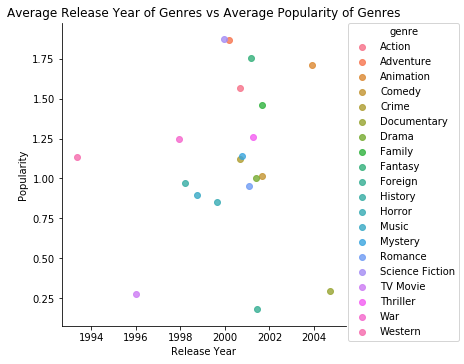

In [21]:
# Average release year of genres vs average popularity of genres
g = sns.lmplot(data=d, x="release_year", y="popularity", hue="genre", fit_reg=False)  # Draw points as separate data without line of fit
ax = plt.gca()
ax.set_title("Average Release Year of Genres vs Average Popularity of Genres")
plt.xlabel("Release Year")
plt.ylabel("Popularity")

Overall, there appears to be no correlation between the average release year of a genre and the popularity of the genre. Documentaries were released more recently on average than other movie genres, however they are the third least popular.

Text(0,0.5,'Frequency of Occurence')

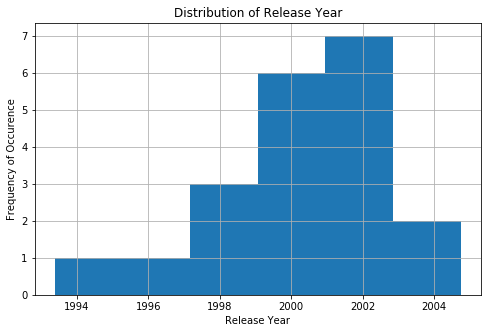

In [22]:
d.release_year.hist(figsize=[8, 5], bins=6)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency of Occurence')

The most frequently occuring release year for movie genres is approximately between 2001 and 2003.

### Part 5: Average Runtime of Genres vs Average Popularity of Genres

Text(37.5228,0.5,'Popularity')

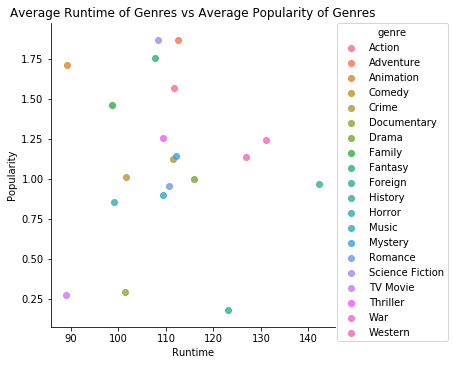

In [23]:
# Average runtime of genres vs average popularity of genres
g = sns.lmplot(data=d, x="runtime", y="popularity", hue="genre", fit_reg=False)  # Draw points as separate data without line of fit
ax = plt.gca()
ax.set_title("Average Runtime of Genres vs Average Popularity of Genres")
plt.xlabel("Runtime")
plt.ylabel("Popularity")

There seems to be no correlation between the average runtime and the average popularity of a genre of movie. History movies have the longest runtimes on average.

Text(0,0.5,'Frequency of Occurence')

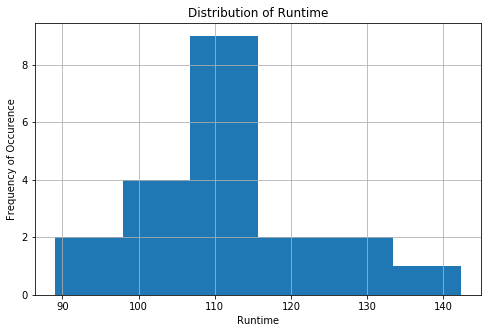

In [24]:
d.runtime.hist(figsize=[8, 5], bins=6)
plt.title('Distribution of Runtime')
plt.xlabel('Runtime')
plt.ylabel('Frequency of Occurence')

The most frequently occuring runtime for movie genres is approximately between 107 and 116.

### Part 6: Vote Average of Genres vs Average Popularity of Genres

Text(37.5228,0.5,'Popularity')

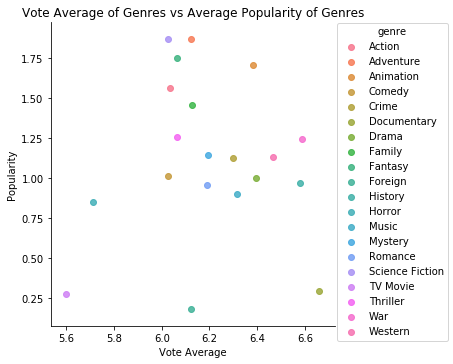

In [25]:
# Vote Average vs Average Popularity of Genres
g = sns.lmplot(data=d, x="vote_average", y="popularity", hue="genre", fit_reg=False)  # Draw points as separate data without line of fit  # Draw line of fit to all points
ax = plt.gca()
ax.set_title("Vote Average of Genres vs Average Popularity of Genres")
plt.xlabel("Vote Average")
plt.ylabel("Popularity")

The highest voted movie genres don't seem to be the most popular genres. Documentaries were the third least popular movies, but had the highest average vote (6.7).

Text(0,0.5,'Frequency of Occurence')

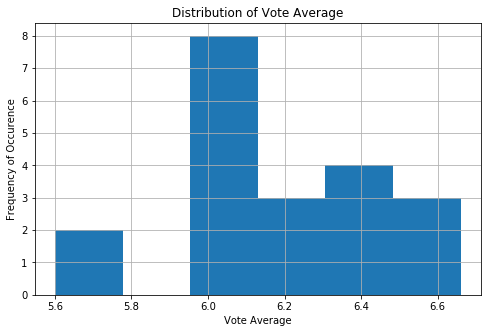

In [26]:
d.vote_average.hist(figsize=[8, 5], bins=6)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency of Occurence')

The most frequently occuring vote budget for movie genres is approximately between 5.95 and 6.15.

<a id='conclusions'></a>
## Conclusions
There are many different factors that seem to correlate with the popularity of a genre, but from the limited data we have here, we cannot conclude what exactly causes a genre to be popular.

#### Factors that seem to contribute to making a genre popular:
- Budget (positive correlation)
- Revenue (positive correlation)

#### Factors that don't seem to contribute to making a genre popular:
- Runtime (no correlation)
- Vote average (no correlation)
- Release year (no correlation)

#### The most popular genres ranked from most popular to least popular:
1. Science Fiction
2. Adventure
3. Fantasy
4. Animation
5. Action
6. Family
7. Thriller
8. War
9. Mystery
10. Western
11. Crime
12. Comedy
13. Drama
14. History
15. Romance
16. Music
17. Horror
18. Documentary
19. TV Movie
20. Foreign

#### Limitations:
- We don't have data for every movie ever made.
- Genre of movies may not be accurate.
- Movies can have multiple genres, so each movie may not be a pure representation of those genres.